In [4]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import Grayscale as gray
import eksplisitt as eks
import ImageView as imv
from Glatting import eksplisittGlatting

Tree   = '../hdr-bilder/Tree/Tree_00032.png'
Balls  = '../hdr-bilder/Balls/Balls_00032.png'

constant = 1.3

In [5]:
def glatting(file, k):              
    orig_im = imageio.imread(file).astype(float)/255     #Originalbilde
    im = np.copy(orig_im)
    orig_gray_im =  gray.rgb2gray(file)
    gray_im =  gray.rgb2gray(file)
    
    im = im + .05 * np.random.randn(* np.shape(im))        #legger på tilfeldig støy
    gray_im = gray_im + .05 * np.random.randn(* np.shape(gray_im)) #legger på tilfeldig støy
    
    im = eksplisittGlatting(im, orig_im, k)
    gray_im = eksplisittGlatting(gray_im, orig_gray_im, k)

    imv.view(orig_im, im, orig_gray_im, gray_im, "Glatting") 

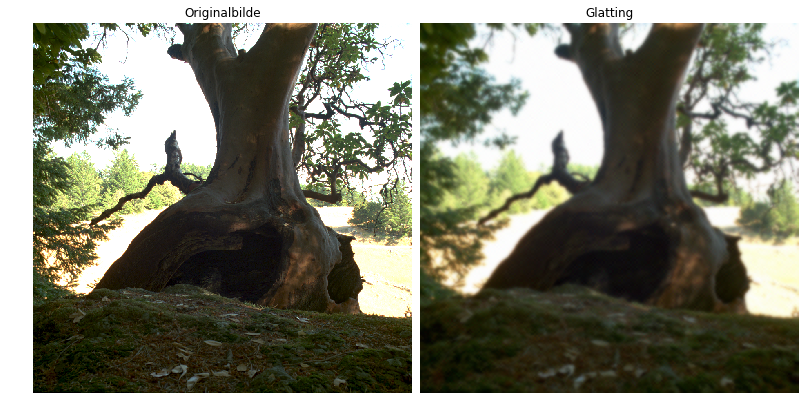

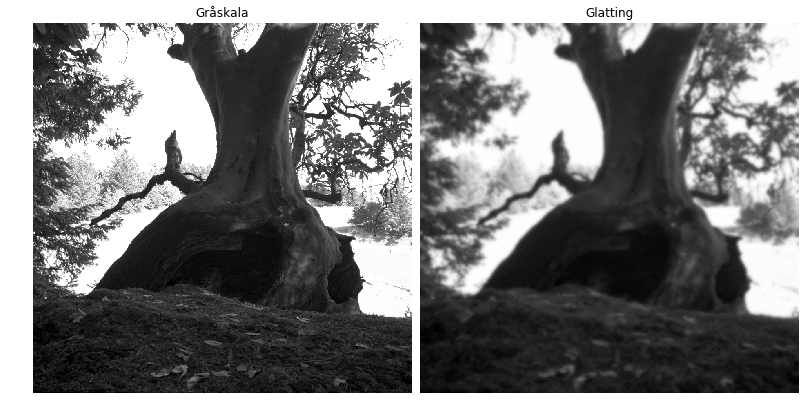

In [6]:
glatting(Tree, constant)

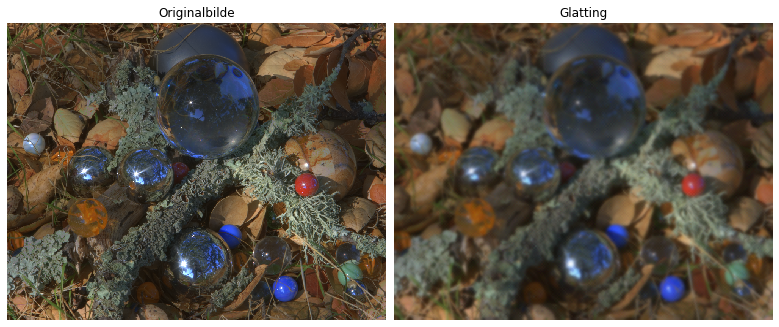

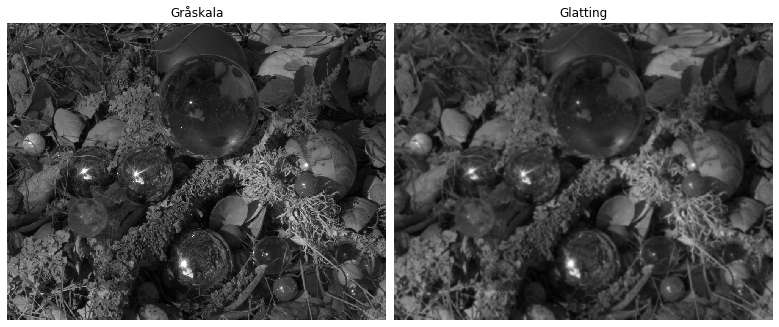

In [5]:
glatting(Balls, constant)